In [1]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np
import re
import nltk

In [3]:
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))

def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))

# Questions 5: Optimising pre-processing and feature extraction (20 marks)

In [4]:
def convert_label(label):
    """Converts the multiple classes into two,
    making it a binary distinction between fake news and real."""
    #return label
    # Converting the multiclass labels to binary label
    labels_map = {
        'true': 'REAL',
        'mostly-true': 'REAL',
        'half-true': 'REAL',
        'false': 'FAKE',
        'barely-true': 'FAKE',
        'pants-fire': 'FAKE'
    }
    return labels_map[label]


def parse_data_line(data_line):
    # Creating a new variable data_line_vals equal to the data_line
    data_line_vals = data_line
    # Label takes the 2nd column of data_line_vals which is being passed throught the convert_label function
    label = convert_label(data_line_vals[1])
    # Statement takes the 3rd column of the data_line_vals
    statement = data_line_vals[2]
    # Returns a tuple of the label as just FAKE or REAL with the statement
    return (label, statement)

In [5]:
def pre_process(text):
    # This will separate punctuation at ends of strings
    text = re.sub(r"(\w)([.,;:!?'\"”\)])", r"\1 \2", text)
    # This will separates punctuation at beginning of strings
    text = re.sub(r"([.,;:!?'\"“\(\)])(\w)", r"\1 \2", text)
    # Now we can split the text on the white-space
    tokens = re.split(r"\s+",text)
    # normalisation all the tokens to lowercase
    tokens = [t.lower() for t in tokens]
    return tokens

In [6]:
global_feature_dict = {} # A global dictionary of features

def to_feature_vector(tokens):
    # Should return a dictionary containing features as keys, and weights as values
    # Creating the local dictionary
    feature_dict = {}
    # Using a for loop to assign equal weights to each token
    for token in tokens:
        if token not in feature_dict.keys():
            feature_dict[token] = 1
        else:
            feature_dict[token] = 1
    # Creating Vocab variable to then help me update global dictionary
    vocab = feature_dict
    global_feature_dict.update(vocab)
    return feature_dict

Below is the code for the other methods I tried

In [7]:
# #Using Stop Words
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))

# # Input: a string of one statement
# def pre_process(text):
#     # This will separate punctuation at ends of strings
#     text = re.sub(r"(\w)([.,;:!'?\"”\)])", r"\1 \2", text)
#     # This will separates punctuation at beginning of strings
#     text = re.sub(r"([.,;:!'?\"“\(\)])(\w)", r"\1 \2", text)
#     # Now we can split the text on the white-space
#     tokens = re.split(r"\s+",text)
#     # normalisation all the tokens to lowercase
#     tokens = [t.lower() for t in tokens]
#     tokens = [t for t in tokens if not t in stop_words]
#     return tokens

In [8]:
# #Lemmatisation
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

# def lemming(tokens):
#     lem = [lemmatizer.lemmatize(t, pos= 'v') for t in tokens]
#     return(lem)

# def pre_process(text):
#     # This will separate punctuation at ends of strings
#     text = re.sub(r"(\w)([.,;:!?'\"”\)])", r"\1 \2", text)
#     # This will separates punctuation at beginning of strings
#     text = re.sub(r"([.,;:!?'\"“\(\)])(\w)", r"\1 \2", text)
#     "studies studying cries cry"
#     # Now we can split the text on the white-space
#     tokens = re.split(r"\s+",text)
#     # normalisation all the tokens to lowercase
#     tokens = [t.lower() for t in tokens]
#     tokens = [t for t in tokens if not t in stop_words]
#     my_tokens = lemming(tokens)
#     return my_tokens

In [9]:
# # Using Bigrams
# def pre_process(text):
#     # This will separate punctuation at ends of strings
#     text = re.sub(r"(\w)([.,;:!?'\"”\)])", r"\1 \2", text)
#     # This will separates punctuation at beginning of strings
#     text = re.sub(r"([.,;:!?'\"“\(\)])(\w)", r"\1 \2", text)
#     # Now we can split the text on the white-space
#     tokens = re.split(r"\s+",text)
#     # normalisation all the tokens to lowercase
#     tokens = [t.lower() for t in tokens]
#     bigrams = []
#     for i in range(len(tokens) - 1):
#         bigrams.append((tokens[i], tokens[i+1]))
#     return bigrams

In [10]:
# # Using Bigrams, Stop words and Lemming
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

# def lemming(tokens):
#     lem = [lemmatizer.lemmatize(t, pos= 'v') for t in tokens]
#     return(lem)

# def pre_process(text):
#     # This will separate punctuation at ends of strings
#     text = re.sub(r"(\w)([.,;:!?'\"”\)])", r"\1 \2", text)
#     # This will separates punctuation at beginning of strings
#     text = re.sub(r"([.,;:!?'\"“\(\)])(\w)", r"\1 \2", text)
#     # Now we can split the text on the white-space
#     tokens = re.split(r"\s+",text)
#     # normalisation all the tokens to lowercase
#     tokens = [t.lower() for t in tokens]
#     tokens = [t for t in tokens if not t in stop_words]
#     my_tokens = lemming(tokens)
#     bigrams = []
#     for i in range(len(my_tokens) - 1):
#         bigrams.append((my_tokens[i], my_tokens[i+1]))
#     return bigrams

In [11]:
# global_feature_dict = {} # A global dictionary of features

# def to_feature_vector(tokens):
#     # Should return a dictionary containing features as keys, and weights as values
#     # DESCRIBE YOUR METHOD IN WORDS
#     feature_dict = {}
#     for token in tokens:
#         if token not in feature_dict.keys():
#             feature_dict[token] = 1
#         else:
#             feature_dict[token] += 1
#     new_dict = {k: v for k, v in feature_dict.items() if v != 1}
#     vocab = new_dict
#     global_feature_dict.update(vocab)
#     return new_dict

In [7]:
# TRAINING AND VALIDATING OUR CLASSIFIER

def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC(C=0.1))])
    return SklearnClassifier(pipeline).train(data)

In [8]:
#solution
from sklearn.metrics import classification_report


def cross_validate(dataset, folds):
    results = []
    fold_size = int(len(dataset)/folds) + 1 #length of dataset/10 + 1 to split the data evenly. so 10 + 1. We add one to allow us to have 10 folds, as python starts at 0.
    
    for i in range(0,len(dataset),int(fold_size)): # range(start at 0, stop at the end of the dataset, for each fold)
        # Trains and tests on the 10 folds of data in the dataset
        train_sample = dataset[:i] + dataset[i+fold_size:]
        test_sample = dataset[i:i+fold_size]
        # Creating the variable cv for the classifier 
        cv = train_classifier(train_sample)
        print("Fold start on items %d - %d" % (i, i+fold_size))
        # Separting the statements and labels in order to pass the statements through the predict labels function
        test_sample_x = [i[0] for i in test_sample]
        test_sample_y = [i[1] for i in test_sample]
        predicted_labels = predict_labels(test_sample_x,cv)
        # Using output_dict=True to access the scores from each fold
        report = classification_report(test_sample_y,predicted_labels,output_dict=True)
        print(report)
        # Defining precision to compute average
        precision = report['REAL']['precision']
        precision_list = []
        precision_list.append(precision)
        #results.append(cv_results)
        avg_precision = np.mean(precision_list)
        # Defining recall to compute average
        recall = report['REAL']['recall']
        recall_list = []
        recall_list.append(recall)
        avg_recall = np.mean(recall_list)
        # Defining f1 score to compute average
        f1_score = report['REAL']['f1-score']
        f1_score_list = []
        f1_score_list.append(f1_score)
        avg_f1_score = np.mean(f1_score_list)
        # Defining accuracy to compute average
        acc = report['accuracy']
        acc_list = []
        acc_list.append(acc)
        avg_acc = np.mean(acc_list)
        # cv_results will now store averages across all folds
        cv_results = [avg_precision,avg_recall,avg_f1_score,avg_acc]
    print(f"The results for my classifier are:\n{cv_results}")

In [9]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(reviewSample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(pre_process(reviewSample)))

In [10]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'data/fake_news.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path) 

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')

Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 10241 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 10241 rawData, 8192 trainData, 2049 testData
Training Samples: 
8192
Features: 
13560


In [11]:
cross_validate(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented

Training Classifier...
Fold start on items 0 - 820
{'FAKE': {'precision': 0.48773006134969327, 'recall': 0.4690265486725664, 'f1-score': 0.47819548872180456, 'support': 339.0}, 'REAL': {'precision': 0.6356275303643725, 'recall': 0.6528066528066528, 'f1-score': 0.6441025641025642, 'support': 481.0}, 'accuracy': 0.5768292682926829, 'macro avg': {'precision': 0.5616787958570328, 'recall': 0.5609166007396096, 'f1-score': 0.5611490264121843, 'support': 820.0}, 'weighted avg': {'precision': 0.574484552320499, 'recall': 0.5768292682926829, 'f1-score': 0.575514151231738, 'support': 820.0}}
Training Classifier...


/Users/samson/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/samson/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 820 - 1640
{'FAKE': {'precision': 0.5364431486880467, 'recall': 0.49066666666666664, 'f1-score': 0.5125348189415041, 'support': 375.0}, 'REAL': {'precision': 0.59958071278826, 'recall': 0.6426966292134831, 'f1-score': 0.6203904555314533, 'support': 445.0}, 'accuracy': 0.573170731707317, 'macro avg': {'precision': 0.5680119307381533, 'recall': 0.5666816479400749, 'f1-score': 0.5664626372364787, 'support': 820.0}, 'weighted avg': {'precision': 0.5707068267668209, 'recall': 0.573170731707317, 'f1-score': 0.5710662314811716, 'support': 820.0}}
Training Classifier...
Fold start on items 1640 - 2460
{'FAKE': {'precision': 0.5740740740740741, 'recall': 0.4744897959183674, 'f1-score': 0.5195530726256984, 'support': 392.0}, 'REAL': {'precision': 0.5846774193548387, 'recall': 0.677570093457944, 'f1-score': 0.6277056277056277, 'support': 428.0}, 'accuracy': 0.5804878048780487, 'macro avg': {'precision': 0.5793757467144565, 'recall': 0.5760299446881556, 'f1-score': 0.5736293501

/Users/samson/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/samson/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 2460 - 3280
{'FAKE': {'precision': 0.5539772727272727, 'recall': 0.5462184873949579, 'f1-score': 0.5500705218617771, 'support': 357.0}, 'REAL': {'precision': 0.6538461538461539, 'recall': 0.6609071274298056, 'f1-score': 0.6573576799140709, 'support': 463.0}, 'accuracy': 0.6109756097560975, 'macro avg': {'precision': 0.6039117132867133, 'recall': 0.6035628074123818, 'f1-score': 0.603714100887924, 'support': 820.0}, 'weighted avg': {'precision': 0.6103666531639091, 'recall': 0.6109756097560975, 'f1-score': 0.6106485147620356, 'support': 820.0}}
Training Classifier...
Fold start on items 3280 - 4100
{'FAKE': {'precision': 0.5375, 'recall': 0.4942528735632184, 'f1-score': 0.5149700598802395, 'support': 348.0}, 'REAL': {'precision': 0.648, 'recall': 0.6864406779661016, 'f1-score': 0.6666666666666666, 'support': 472.0}, 'accuracy': 0.6048780487804878, 'macro avg': {'precision': 0.59275, 'recall': 0.59034677576466, 'f1-score': 0.590818363273453, 'support': 820.0}, 'weighte

/Users/samson/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/samson/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 4100 - 4920
{'FAKE': {'precision': 0.5063291139240507, 'recall': 0.4584527220630373, 'f1-score': 0.4812030075187971, 'support': 349.0}, 'REAL': {'precision': 0.625, 'recall': 0.6687898089171974, 'f1-score': 0.6461538461538461, 'support': 471.0}, 'accuracy': 0.5792682926829268, 'macro avg': {'precision': 0.5656645569620253, 'recall': 0.5636212654901174, 'f1-score': 0.5636784268363215, 'support': 820.0}, 'weighted avg': {'precision': 0.5744925131213338, 'recall': 0.5792682926829268, 'f1-score': 0.5759491599542947, 'support': 820.0}}
Training Classifier...
Fold start on items 4920 - 5740
{'FAKE': {'precision': 0.5245398773006135, 'recall': 0.4899713467048711, 'f1-score': 0.5066666666666666, 'support': 349.0}, 'REAL': {'precision': 0.6396761133603239, 'recall': 0.6709129511677282, 'f1-score': 0.6549222797927462, 'support': 471.0}, 'accuracy': 0.5939024390243902, 'macro avg': {'precision': 0.5821079953304686, 'recall': 0.5804421489362996, 'f1-score': 0.5807944732297063, 

/Users/samson/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/samson/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 5740 - 6560
{'FAKE': {'precision': 0.5195195195195195, 'recall': 0.484593837535014, 'f1-score': 0.5014492753623188, 'support': 357.0}, 'REAL': {'precision': 0.62217659137577, 'recall': 0.6544276457883369, 'f1-score': 0.6378947368421052, 'support': 463.0}, 'accuracy': 0.5804878048780487, 'macro avg': {'precision': 0.5708480554476447, 'recall': 0.5695107416616755, 'f1-score': 0.569672006102212, 'support': 820.0}, 'weighted avg': {'precision': 0.5774832076529878, 'recall': 0.5804878048780487, 'f1-score': 0.578491042027125, 'support': 820.0}}
Training Classifier...
Fold start on items 6560 - 7380
{'FAKE': {'precision': 0.5100286532951289, 'recall': 0.4903581267217631, 'f1-score': 0.5, 'support': 363.0}, 'REAL': {'precision': 0.6072186836518046, 'recall': 0.6258205689277899, 'f1-score': 0.6163793103448276, 'support': 457.0}, 'accuracy': 0.5658536585365853, 'macro avg': {'precision': 0.5586236684734668, 'recall': 0.5580893478247765, 'f1-score': 0.5581896551724138, 'suppor

/Users/samson/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/samson/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [18]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    cm = metrics.confusion_matrix(y_true=y_test, y_pred=preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.savefig('results/Confusion Matrix Optimised', dpi=300)
    plt.show() # ta-da!
    plt.show()

In [13]:
# Our classfier
cv = train_classifier(train_data)
# Repeat the process in cross validate but now for the test data
test_x = [i[0] for i in test_data]
test_y = [i[1] for i in test_data]
pred = predict_labels(test_x,cv)
cv_results = classification_report(test_y,pred)

print(cv_results)

Training Classifier...
              precision    recall  f1-score   support

        FAKE       0.55      0.49      0.52       926
        REAL       0.61      0.66      0.64      1123

    accuracy                           0.59      2049
   macro avg       0.58      0.58      0.58      2049
weighted avg       0.58      0.59      0.58      2049



/Users/samson/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


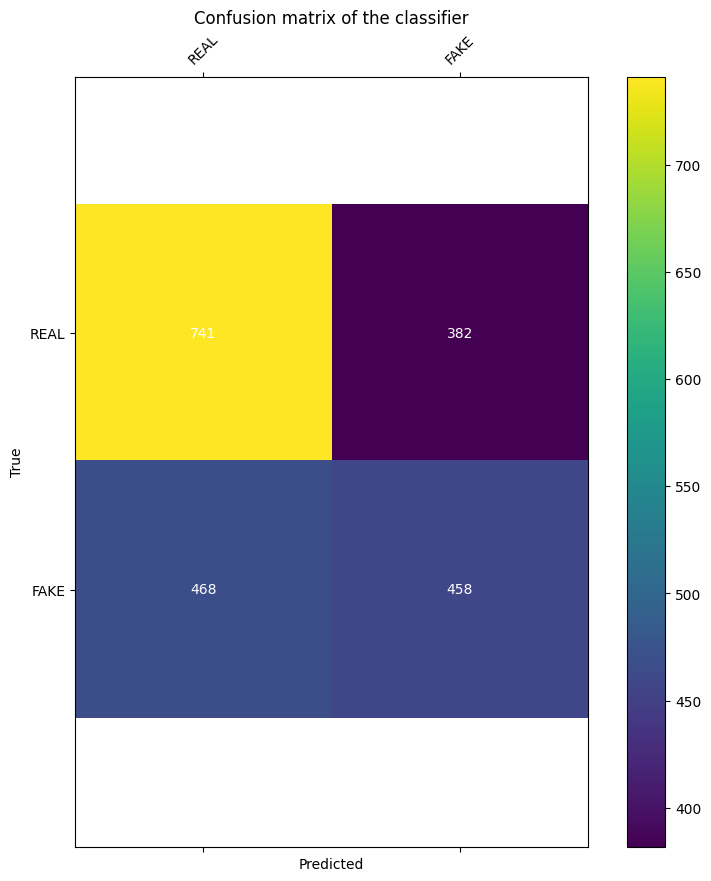

In [19]:
confusion_matrix_heatmap(test_y, pred, labels=['REAL','FAKE'])

In [15]:
# Looking at the 1st fold.
fold_size = int((len(test_data)/10)+1)
# Accessing the 1st fold
test_sample = test_data[0:0+fold_size]
# The statement from the test sample
err_test_x = [i[0] for i in test_sample]
# The label from the test sample
err_test_y = [i[1] for i in test_sample]
err_pred = predict_labels(err_test_x,cv)

In [20]:
for i in range(len(err_pred)):
    # If the predicted label is Real
    if pred[i] == 'REAL':
        if err_test_y[i] == 'FAKE': # and the real label is Fake
            with open('results/FP_1.txt', 'a') as f:
                print('\nfalse positive => predicted: REAL => ground truth: FAKE\n' ,err_test_x[i], file=f)
    # Else meaing that the predicted label is Fake            
    else:
        if err_test_y[i] == 'REAL': # and the real label is Real
            with open('results/FN_1.txt', 'a') as f:
                print('\nfalse negative => predicted: FAKE => ground truth: REAL\n',err_test_x[i], file=f)

In [17]:
# Finally, check the accuracy of your classifier by training on all the traning data
# and testing on the test set
# Will only work once all functions are complete
functions_complete = True  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])

({'the': 1, 'bush': 1, 'tax': 1, 'cuts': 1, 'helped': 1, 'to': 1, 'create': 1, 'a': 1, 'substantial': 1, 'part': 1, 'of': 1, 'deficit': 1, '.': 1}, 'REAL')
Training Classifier...
Done training!
Precision: 0.582323
Recall: 0.585163
F Score:0.582712


/Users/samson/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
